In [9]:
# Import necessary libraries
import numpy as np
import cv2
from scipy.spatial import distance
import matplotlib.pyplot as plt
import tensorflow as tf


In [10]:
# Load the cascade classifier
face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_model

< cv2.CascadeClassifier 0x7fb7df2c02b0>

shape of the image : (262, 400, 3)
shape of the image after gray scaling :  (262, 400, 4)
(x-axis - no of faces detected) (y-axis - coordinates of rectangular boundary box)  :  (3, 4)


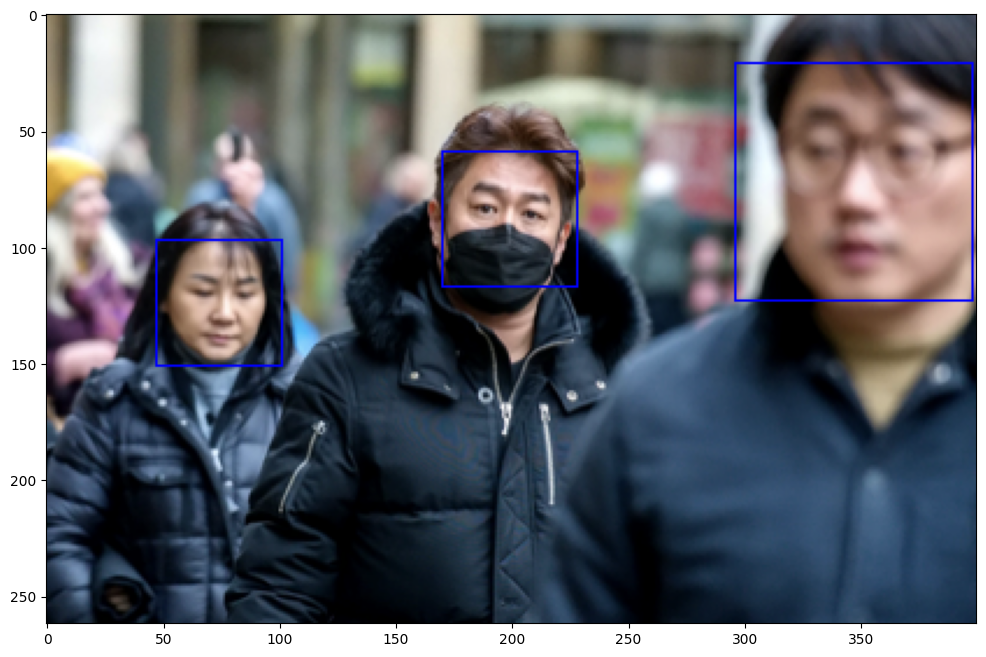

In [11]:
#trying it out on a sample image
img = cv2.imread('archive/images/maksssksksss244.png')
print(f'shape of the image : {img.shape}')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
print(f'shape of the image after gray scaling :  {img.shape}')

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

if len(faces) == 0:
    print('No faces detected')

else:
    print(f'(x-axis - no of faces detected) (y-axis - coordinates of rectangular boundary box)  :  {faces.shape}')




out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image


for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [12]:
MIN_DISTANCE = 130 # Detecting social distancing violations

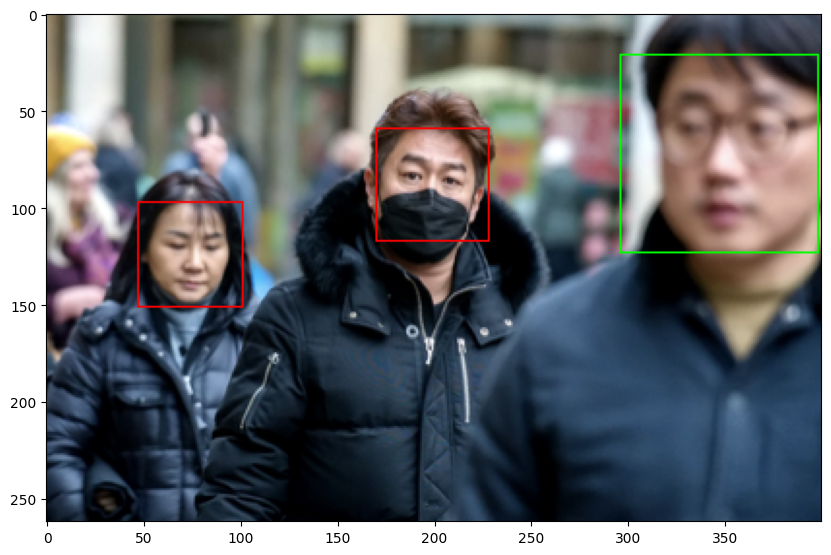

In [13]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

In [14]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [15]:
model = tf.keras.models.load_model('/Users/akshay/projects/face_mask_model/Netmask_10_epoch.h5')

1/1 [==============================] - 0s 76ms/step


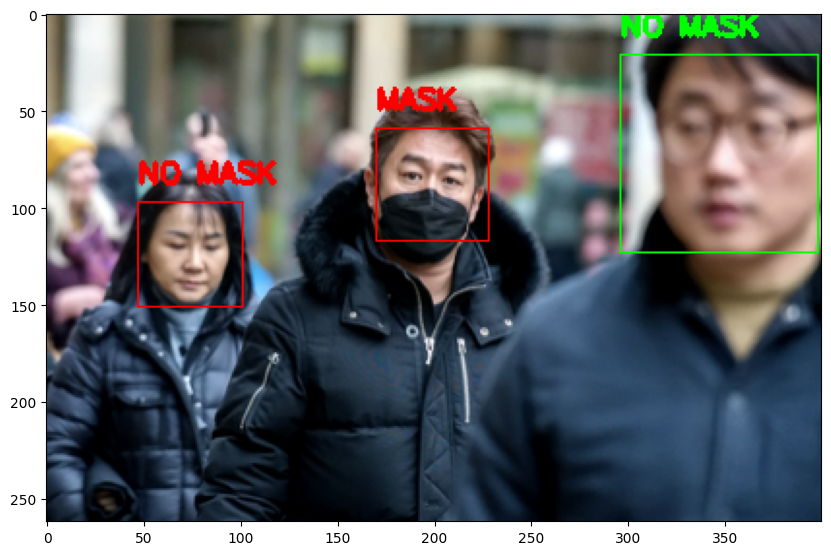

In [16]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")